In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('heart.csv')
data = data[['cp', 'slp', 'output']]

X = data.drop('output', axis=1)
y = data['output']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
logistic_reg = LogisticRegression(max_iter=1000, C=1.0, random_state=42)
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8525
Precision: 0.8378
Recall: 0.9118
F1 Score: 0.8732


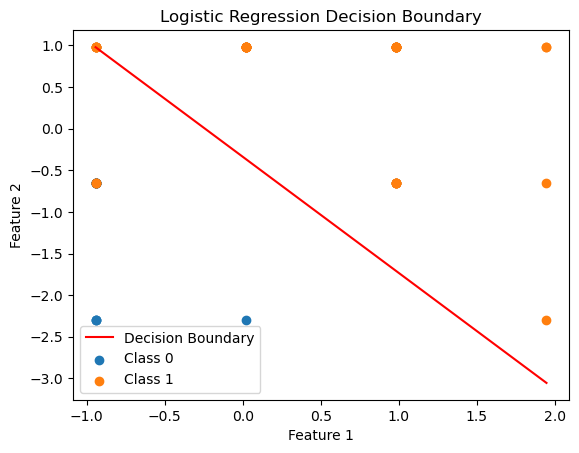

In [5]:
# Plot the decision boundary (Note: This part assumes a 2D dataset for simplicity)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Class 1')

# Calculate and plot the decision boundary line
x_boundary = np.array([min(X_test[:, 0]), max(X_test[:, 0])])
y_boundary = -(logistic_reg.intercept_ + logistic_reg.coef_[0, 0] * x_boundary) / logistic_reg.coef_[0, 1]
plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()


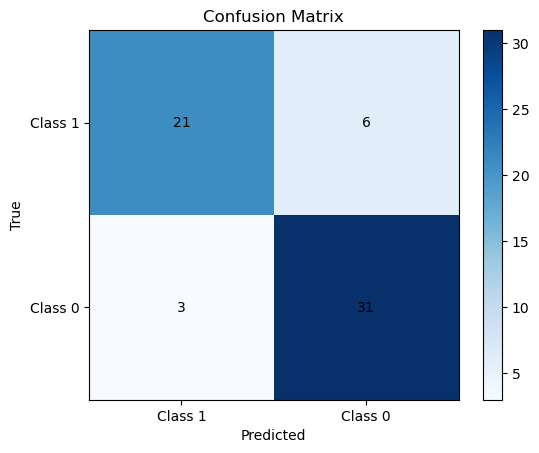

In [6]:

# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_mat[i, j]), ha='center', va='center', color='black')

plt.xticks(tick_marks, ['Class 1', 'Class 0'])
plt.yticks(tick_marks, ['Class 1', 'Class 0'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


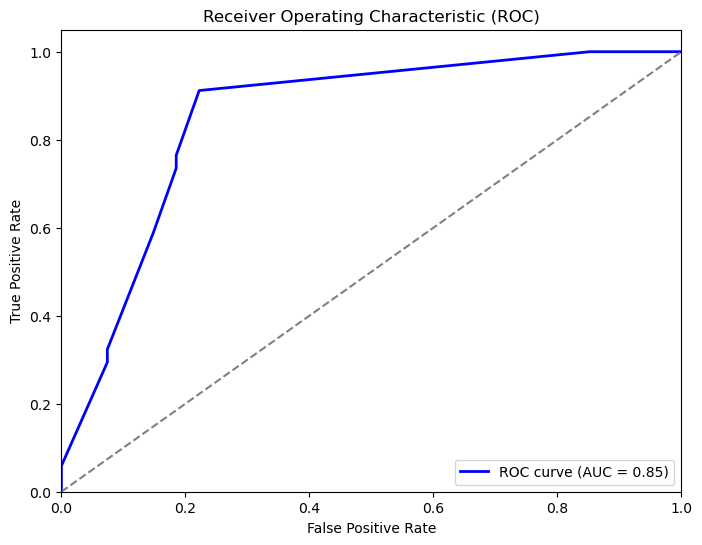

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_prob = logistic_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
